<a href="https://colab.research.google.com/github/SameerShafayet/Attention-Visualizer-/blob/main/Attention_Visualizer_VIT_base.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install transformers torchvision matplotlib Pillow

In [2]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import requests
from transformers import ViTModel, ViTImageProcessor

In [3]:
processor = ViTImageProcessor.from_pretrained("google/vit-base-patch16-224")
model = ViTModel.from_pretrained("google/vit-base-patch16-224", output_attentions=True)
model.eval()

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


preprocessor_config.json:   0%|          | 0.00/160 [00:00<?, ?B/s]

config.json: 0.00B [00:00, ?B/s]

model.safetensors:   0%|          | 0.00/346M [00:00<?, ?B/s]

Some weights of ViTModel were not initialized from the model checkpoint at google/vit-base-patch16-224 and are newly initialized: ['pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


ViTModel(
  (embeddings): ViTEmbeddings(
    (patch_embeddings): ViTPatchEmbeddings(
      (projection): Conv2d(3, 768, kernel_size=(16, 16), stride=(16, 16))
    )
    (dropout): Dropout(p=0.0, inplace=False)
  )
  (encoder): ViTEncoder(
    (layer): ModuleList(
      (0-11): 12 x ViTLayer(
        (attention): ViTAttention(
          (attention): ViTSelfAttention(
            (query): Linear(in_features=768, out_features=768, bias=True)
            (key): Linear(in_features=768, out_features=768, bias=True)
            (value): Linear(in_features=768, out_features=768, bias=True)
          )
          (output): ViTSelfOutput(
            (dense): Linear(in_features=768, out_features=768, bias=True)
            (dropout): Dropout(p=0.0, inplace=False)
          )
        )
        (intermediate): ViTIntermediate(
          (dense): Linear(in_features=768, out_features=3072, bias=True)
          (intermediate_act_fn): GELUActivation()
        )
        (output): ViTOutput(
          (d

(np.float64(-0.5), np.float64(4271.5), np.float64(2847.5), np.float64(-0.5))

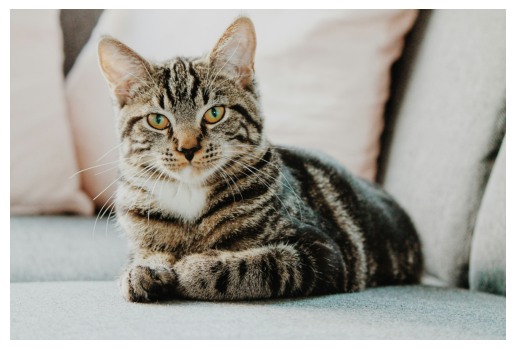

In [5]:
url = "https://images.unsplash.com/photo-1518791841217-8f162f1e1131"

image = Image.open(requests.get(url, stream=True).raw).convert("RGB")
plt.imshow(image)
plt.axis("off")

In [6]:
inputs = processor(images=image, return_tensors="pt")

with torch.no_grad():
    outputs = model(**inputs)

attentions = outputs.attentions   # List of attention maps (1 per layer)
len(attentions)

12

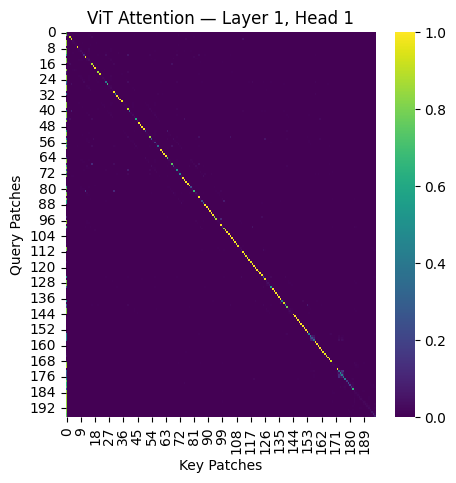

In [8]:
layer = 0   # 0–11
head = 0    # 0–11

attn = attentions[layer][0, head].numpy()

plt.figure(figsize=(5, 5))
sns.heatmap(attn, cmap="viridis")
plt.title(f"ViT Attention — Layer {layer+1}, Head {head+1}")
plt.xlabel("Key Patches")
plt.ylabel("Query Patches")
plt.show()

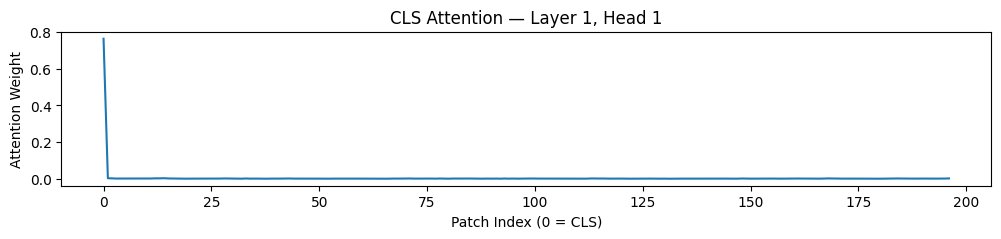

In [9]:
cls_attn = attn[0]   # CLS attends to all other tokens

plt.figure(figsize=(12, 2))
plt.plot(cls_attn)
plt.title(f"CLS Attention — Layer {layer+1}, Head {head+1}")
plt.xlabel("Patch Index (0 = CLS)")
plt.ylabel("Attention Weight")
plt.show()

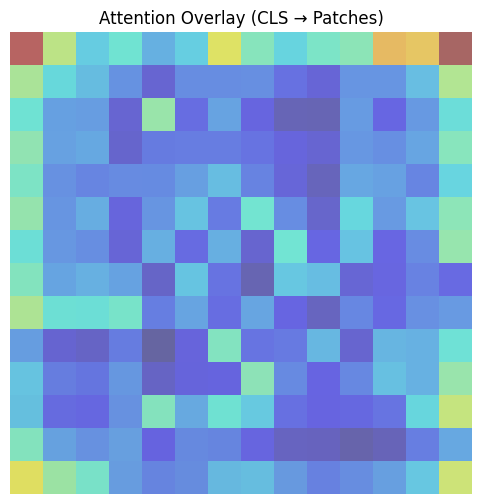

In [10]:
cls_attn = attn[0, 1:]
num_patches = int(np.sqrt(len(cls_attn)))

attn_grid = cls_attn.reshape(num_patches, num_patches)

plt.figure(figsize=(6, 6))
plt.imshow(image.resize((224, 224)))
plt.imshow(attn_grid, cmap="jet", alpha=0.5)
plt.title("Attention Overlay (CLS → Patches)")
plt.axis("off")
plt.show()

In [11]:
from ipywidgets import interact, IntSlider

def show_vit_attention(layer=0, head=0):
    attn = attentions[layer][0, head].numpy()
    cls_attn = attn[0, 1:]
    num_patches = int(np.sqrt(len(cls_attn)))
    grid = cls_attn.reshape(num_patches, num_patches)

    plt.figure(figsize=(6, 6))
    plt.imshow(image.resize((224, 224)))
    plt.imshow(grid, cmap="jet", alpha=0.5)
    plt.axis("off")
    plt.title(f"Layer {layer+1}, Head {head+1}")
    plt.show()

interact(
    show_vit_attention,
    layer=IntSlider(min=0, max=11, step=1, value=0),
    head=IntSlider(min=0, max=11, step=1, value=0)
);

interactive(children=(IntSlider(value=0, description='layer', max=11), IntSlider(value=0, description='head', …